# Basic NN without L2 Regularization

## CS640

### U59844514 Xiankang Wu

### U37992938 Rongyu Wang

<p>      This code is about the implementation of a basic neural network without L2 Regularization.
    
<p>      We applied 5-fold cross validation to help reduce overfitting.
    
<p>      <b>Check out our solution to Problem 2 at the end.</b>

In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.
from sklearn.model_selection import KFold    #k-fold cross-validation

In [2]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    #Here we need to add a parameter hidden_dim
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            hidden_dim: Number of nodes in the hidden layer
        """
        #initialize a(1) and a(2) with random matrix(input_dim * hidden_dim)
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.bias1 = np.zeros((1, hidden_dim))
        #initialize a(2) and a(3) with random matrix(hidden_dim * output_dim)
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim) 
        self.bias2 = np.zeros((1, output_dim))
    #--------------------------------------------------------------------------
    
    #Not sure if needed:
    #def tanh_deriv(x):
        #return 1.0 - np.tanh(x)**2
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.

        args:
            X: Data array
            y: Labels corresponding to input data

        returns:
            cost: average cost per data sample
        """
        #Number of entries in .csv
        num_examples = np.shape(X)[0]
        # Hyperbolic tangent funcition as activation function
        z1 = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z1)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        
        #axis = 1: sum over rows
        #We can see that 0≤softmax_scores≤1. the values of softmax_scores can be considered as probabilities.
        #https://math.stackexchange.com/questions/2471528/understanding-the-softmax-function
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss
    #--------------------------------------------------------------------------
    
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z1 = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z1)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
    
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    # default learning rate = 0.01
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha=0.01):
        
        #Learns model parameters to fit the data.
        for epoch in range(0, num_epochs):
            
            # Forward propagation
            z1 = np.dot(X, self.theta1) + self.bias1
            a = np.tanh(z1)
            z2 = np.dot(a, self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)                

            # Backpropagation
            beta1 = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i, y[i]] = 1
            beta2 = softmax_scores - one_hot_y
            
            # Compute gradients of model parameters
            dtheta2 = np.dot(a.T, beta2)
            dbias2 = np.sum(beta2, axis = 0, keepdims=True) 
            beta1 = np.dot(beta2, self.theta2.T) * (1 - np.power(a, 2))
            dtheta1 = np.dot(X.T, beta1)                                   
            dbias1 = np.sum(beta1, axis = 0)
            
            
            # Gradient descent parameter update
            # alpha is the learning rate
            self.theta2 -= alpha * dtheta2
            self.bias2  -= alpha * dbias2
            self.theta1 -= alpha * dtheta1
            self.bias1  -= alpha * dbias1
        return 0

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    # Makes a prediction based on current model parameters.
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, alpha = 0.05)
    plt.show()

In [4]:
def Confusion_matrix(X, y):
    acc = 0
    y_pred = logreg.predict(X)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]: 
            acc += 1
    acc = acc*1.0/len(y_pred)
    
    return acc, con_mat

### Linear Data Training

In [5]:
#1. Load data
X = np.genfromtxt('DATA/data_linearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_linearY.csv', delimiter=',').astype(np.int64)

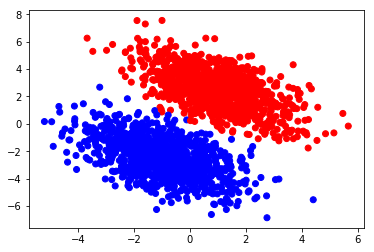

In [6]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [7]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 3
# hidden_dim added in the class initializer list. Indicating the number of hidden nodes
logreg = LogisticRegression(input_dim, output_dim, hidden_dim)

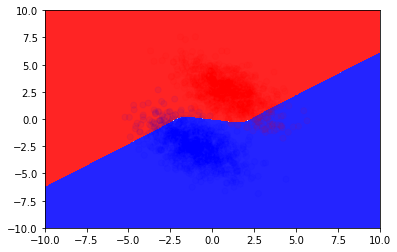

In [8]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

### Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

In [9]:
#5. Train the model
logreg.fit(X,y,1000,alpha=0.001)

0

In [12]:
#6. 5-fold cross-validation and data analysis
kf = KFold(n_splits = 5)
i = 1
for train_index, test_index in kf.split(X,y):
    print ("The", i, "th cross-validation:")
    i = i + 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.001) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
    print ("Confusion Matrix: \n", con_mat)
    print ("Accuracy:", acc)
    print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

The 1 th cross-validation:
Confusion Matrix: 
 [[202.   0.]
 [  1. 197.]]
Accuracy: 0.9975
Cost: 0.004400331458904776 

The 2 th cross-validation:
Confusion Matrix: 
 [[198.   2.]
 [  0. 200.]]
Accuracy: 0.995
Cost: 0.008758633344600147 

The 3 th cross-validation:
Confusion Matrix: 
 [[205.   0.]
 [  0. 195.]]
Accuracy: 1.0
Cost: 0.0010414447336953526 

The 4 th cross-validation:
Confusion Matrix: 
 [[192.   0.]
 [  0. 208.]]
Accuracy: 1.0
Cost: 2.31622480922339e-05 

The 5 th cross-validation:
Confusion Matrix: 
 [[202.   0.]
 [  0. 198.]]
Accuracy: 1.0
Cost: 0.0009313030167056012 



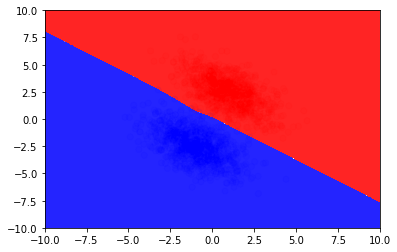

In [13]:
#7. Plot decision boundary after trainning
plot_decision_boundary(logreg, X, y)

### Non linear Data Training

In [14]:
#1. Load data
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)

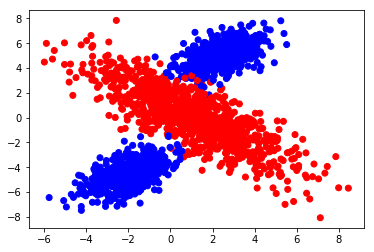

In [15]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [16]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
# hidden_dim added in the class initializer list
logreg = LogisticRegression(input_dim, output_dim, 3)

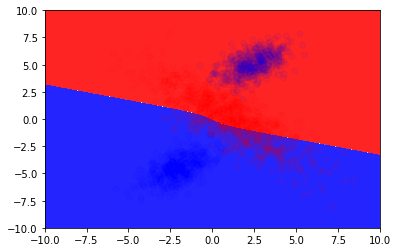

In [17]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

### Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

In [18]:
#5. Train the model
logreg.fit(X,y,1000,alpha=0.001)

0

In [20]:
#6. 5-fold cross-validation and data analysis
kf = KFold(n_splits = 5)
i = 1
for train_index, test_index in kf.split(X,y):
    print ("The", i, "th cross-validation:")
    i = i + 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.001) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
    print ("Confusion Matrix: \n", con_mat)
    print ("Accuracy:", acc)
    print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

The 1 th cross-validation:
Confusion Matrix: 
 [[195.   3.]
 [  4. 198.]]
Accuracy: 0.9825
Cost: 0.0450162329845284 

The 2 th cross-validation:
Confusion Matrix: 
 [[181.   2.]
 [  8. 209.]]
Accuracy: 0.975
Cost: 0.07375250834677917 

The 3 th cross-validation:
Confusion Matrix: 
 [[195.   4.]
 [  4. 197.]]
Accuracy: 0.98
Cost: 0.06178457027960594 

The 4 th cross-validation:
Confusion Matrix: 
 [[214.   3.]
 [  3. 180.]]
Accuracy: 0.985
Cost: 0.03853792811389257 

The 5 th cross-validation:
Confusion Matrix: 
 [[194.   9.]
 [  2. 195.]]
Accuracy: 0.9725
Cost: 0.06876707339099401 



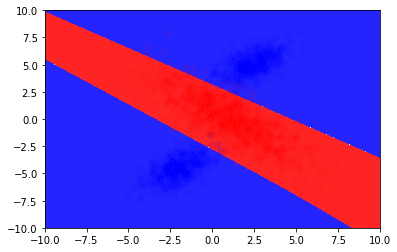

In [21]:
#7. Plot decision boundary after trainning
plot_decision_boundary(logreg, X, y)

## Problem 2: The usefulness of cross validation

<p> By doing cross-validation, we can use all our existing data both for training and for testing. 
<P> If we only train our model without splitting the original training data, we cannot validate if the model trianed is biased or performs well only on existing data by chance. 
When we want to avoid overfitting, cross validation is very useful. It allows us to adjust hyperparameters with only the original training set. By integrating cross validation, we can train our model and validate its result using other parts of training data as unseen data set, and detect if there are large variations in the confusion matrix.